# Extended figures for AP paleoceanography 
Figures to address reviewer comments and support interpretation of SS.


In [1]:
cd '/Users/starr/My Drive/Files/Projects/U1475/subproject_repos/SS_Paper/Starr_etal_ACC'

/Users/starr/My Drive/Files/Projects/U1475/subproject_repos/SS_Paper/Starr_etal_ACC


In [4]:
# PREAMBLE - import dependencies
import numpy as np
import matplotlib as mpl
import pandas as pd
import matplotlib.gridspec as gridspec

from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import gridspec as gs
from scipy.interpolate import interp1d
from scipy.interpolate import PchipInterpolator
from scipy.stats import sem
from scipy import signal
from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
from scipy.ndimage import gaussian_filter1d
from scipy.stats import shapiro

# plotting style
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.size'] = 10
mpl.rcParams["mathtext.fontset"] = "dejavusans"

mis_bounds = pd.read_csv('data/misc/LR04_MISboundaries.txt')
# remove sub-stages from table\n",
mis_bounds.drop([4,5,6,7,8],inplace=True)
mis_bounds.iloc[-1] = {'MIS':'0/1','Age(ka)':0}
mis_bounds.sort_values('Age(ka)',inplace=True)
mis_bounds.reset_index(drop=True,inplace=True)


def age_model(depth_in,ties):
    f = interp1d(ties.iloc[:,0],ties.iloc[:,1],fill_value='extrapolate')
    age = f(depth_in)
    return age

In [5]:
def filtered(x,y,highcut,tnew = [0,0]):
    """ Interpolate to linear scale and apply low-pass butterworth filter
    
   
    returns:
    x_lin -- the linear scale for the desired record
    r_filt -- the filtered RGB red record
    r_lin -- the linearly inteprolated RGB red record
    """
    fs = np.mean(np.diff(x))

    if len(tnew)>2:
        x_lin = tnew
    else:
        minx = np.min(x)+1
        maxx = np.max(x)-1
        x_lin = np.arange(minx,maxx,fs)
    f = interp1d(x,y,fill_value='extrapolate')
    y_lin = f(x_lin)
    y_filt = butter_lowpass_filter(y_lin, highcut, 1/fs, order=5)
    return x_lin, y_filt, y_lin

def butter_lowpass(highcut, fs, order=5):
    nyq = 0.5 * fs
    high = highcut/nyq
    b, a = signal.butter(order, high, btype='low',analog=False)
    return b, a

def butter_lowpass_filter(data, highcut, fs = 0.5, order=6):
    b, a = butter_lowpass(highcut, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y



lpf = 1/4


In [6]:
# load data
## ---- APcomp! ---- ##
apcomp = pd.read_csv('tables/ap_comp_ss.csv')

##### external data #####
## ---- MD02-2589 ---- ##
md022589_ss = pd.read_csv('tables/md02_2589_ss.csv')

## ---- ODP1123 ---- ##
odp1123_ss = pd.read_csv('tables/odp1123_ss.csv')

## ---- Romero MD02-2588 data ---- ##
romero = pd.read_excel('data/external_data.xlsx',sheet_name='Romero_MD02_2588',header=10)

## ---- Tangunan U1475 data ---- ##
tang = pd.read_excel('data/external_data.xlsx',sheet_name='Tangunan_U1475',header=12)

## ---- ODP 1089 Clay Data from Diekmann and Kuhn ---- ##
odp1089_clay = pd.read_excel('data/external_data.xlsx',sheet_name='ODP1089',header=24)

## ---- ODP 1090 clay data from Diekmann and Kuhn (2002) ---- ##
odp1090_clay = pd.read_excel('data/external_data.xlsx',sheet_name='ODP1090_clay',header=19)

## ---- PS2561-1 clay data from Krüger et al., 2008 ---- ##
ps2561_clay = pd.read_excel('data/external_data.xlsx',sheet_name='PS2561_1',header=18)

## ---- ODP 1090 alkenone data from Martinez-Garcia et al., 2010
odp1090_sst = pd.read_excel('data/external_data.xlsx',sheet_name='ODP1090_SST',header=7)

## ---- U1475 %NPS (Marcks et al., 2023) ---- ##
u1475_nps = pd.read_excel('data/external_data.xlsx',sheet_name='U1475_NPS',header=11)

## ---- U1475 SST (Tangunan et al 2021 + Cartagena-Sierra et al., 2021) ---- ##
u1475_sst = pd.read_excel('data/external_data.xlsx',sheet_name='U1475_SST',header=10)

## ---- ODP 1090 % NPS (Becquey and Gersonde 2002) ---- ##
odp1090_nps = pd.read_excel('data/external_data.xlsx',sheet_name='ODP1090_NPS',header=14)


<>:188: SyntaxWarning: invalid escape sequence '\m'
<>:191: SyntaxWarning: invalid escape sequence '\m'
<>:188: SyntaxWarning: invalid escape sequence '\m'
<>:191: SyntaxWarning: invalid escape sequence '\m'
/var/folders/c_/cgbnj8n943z0v0kv5qjmw2s00000gn/T/ipykernel_40052/73601682.py:188: SyntaxWarning: invalid escape sequence '\m'
  a.set_ylabel('$\mathrm{\Delta U_{Holo}\ (cm/s)}$')
/var/folders/c_/cgbnj8n943z0v0kv5qjmw2s00000gn/T/ipykernel_40052/73601682.py:191: SyntaxWarning: invalid escape sequence '\m'
  a.set_ylabel('$\mathrm{\Delta U_{Holo}\ (cm/s)}$')


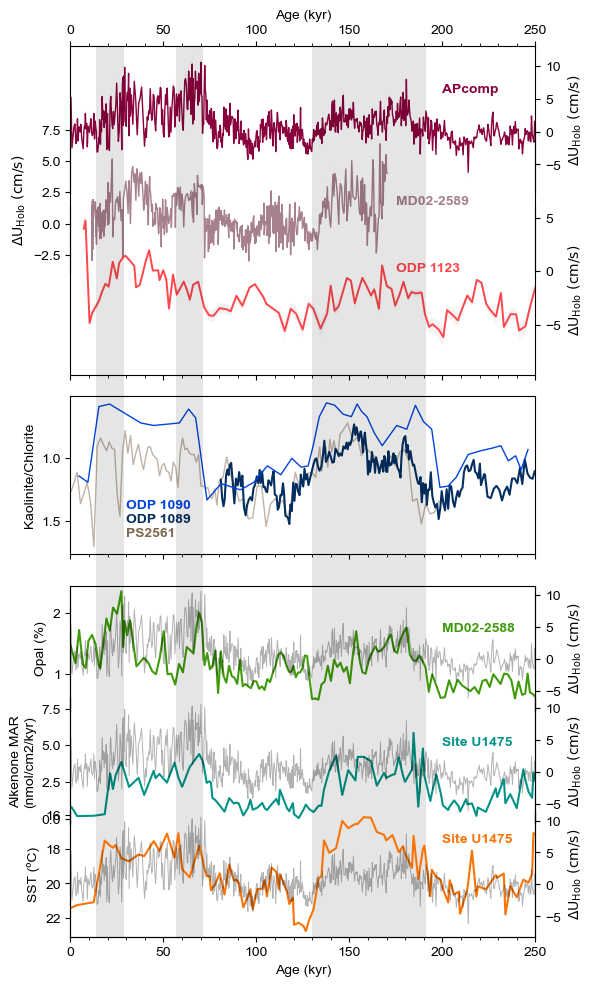

In [7]:
### color
c2 = '#023e8a'
c3 = 'xkcd:denim'
c1 = '#89023e'
c4 = '#a6808c'

# #### figure

f,ax = plt.subplots(7,1,figsize=(6,11),gridspec_kw={'height_ratios':[1,1,1,1,1,1,1]},sharex=True)

### Sortable Silt records
## APcomp
x = apcomp['LR04_age']
y = apcomp['dU_dhol_mccave']
yerr = apcomp['dU_dhol_mccave_2std']
n = y.notnull()
ax[0].fill_between(x[n],y[n]-yerr[n],y[n]+yerr[n],alpha=0.1,ec='none',fc=c1)
ax[0].plot(x[n],y[n],color=c1,alpha=1,lw=1)

## 2589
x = md022589_ss['Age [kyr]']
y = md022589_ss['dU_dhol_mccave']
yerr = md022589_ss['dU_dhol_mccave_2std']
n = y.notnull()
ax[1].fill_between(x,y-yerr,y+yerr,alpha=0.1,ec='none',fc=c4)
ax[1].plot(x[n],y[n],color=c4,alpha=1,lw=1)

## 1123
x = odp1123_ss['LR04 Age (Elderfield 2012)']
y = odp1123_ss['dU_dhol_mccave']
yerr = odp1123_ss['dU_dhol_mccave_2std']
n = y.notnull()
ax[2].fill_between(x,y-yerr,y+yerr,alpha=0.1,ec='none',fc=c4)
ax[2].plot(x[n],y[n],color='xkcd:light red',alpha=1,lw=1.4)

### Clay records
## PS2561 (Kruger2008)
y = ps2561_clay['Kln/Chl']
n = y.notnull()
t = ps2561_clay['Age [ka BP]']
y = y[n]
ax[3].plot(t,y,color='xkcd:dark taupe',alpha=0.5,lw=1)
ax[3].set_ylabel('Kaolinite/Chlorite')
ax[3].invert_yaxis()

## ODP 1089
odp1089_clay=odp1089_clay.sort_values(by='Age [ka BP]')
y = odp1089_clay['Kln [%] (in clay fraction, X-ray diffr...)'] / odp1089_clay['Chl [%] (in clay fraction, X-ray diffr...)']
t = odp1089_clay['Age [ka BP]']
n = y.notnull()
t=t[n]
y=y[n]
n = t<250
t=t[n]
y=y[n]
ax[3].plot(t,y,color='xkcd:marine')

## ODP 1090
y = odp1090_clay['Kao/Chl']
t = odp1090_clay['Age (Martinez)']
n = y.notnull()
t=t[n]
y=y[n]
n = t<250
t=t[n]
y=y[n]
ax[3].plot(t,y,color='xkcd:blue',lw=1)


### Hydrography at AP
## Romero
x = romero['Age (Starr2021) [ka BP]']
y = romero['bSiO2 [%]']
n = y.notnull()
ax[4].plot(x[n],y[n],color='xkcd:grass green')

ax4 = ax[4].twinx()
x = apcomp['LR04_age']
y = apcomp['dU_dhol_mccave']
n = y.notnull()
ax4.plot(x[n],y[n],color='k',alpha=0.3,lw=0.7)

## Tangunan alkneone accumulation
x = tang['Age [ka BP]']
y = tang['Acc rate alk [nmol/cm**2/ka]']
n = y.notnull()
ax[5].plot(x[n],y[n],color='xkcd:teal')

ax5 = ax[5].twinx()
x = apcomp['LR04_age']
y = apcomp['dU_dhol_mccave']
n = y.notnull()
ax5.plot(x[n],y[n],color='k',alpha=0.3,lw=0.7)

## Tangunan SST
x = tang['Age [ka BP]']
y = tang['SST (1-12) [°C].1']
n = y.notnull()
ax[6].plot(x[n],y[n],color='xkcd:orange')

ax6 = ax[6].twinx()
x = apcomp['LR04_age']
y = apcomp['dU_dhol_mccave']
n = y.notnull()
ax6.plot(x[n],y[n],color='k',alpha=0.3,lw=0.7)

ax[6].invert_yaxis()

### format
ax[0].set_xlim(0,250)


## ax[0-3]
for a in ax:
    a.patch.set_visible(False)
ax[0].xaxis.set_ticks_position('top')
ax[0].xaxis.set_label_position('top')
ax[0].spines['bottom'].set_visible(False)  
ax[0].yaxis.set_ticks_position('right')
ax[0].yaxis.set_label_position('right')
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].xaxis.set_ticks_position('none')

ax[2].spines['top'].set_visible(False)
ax[2].yaxis.set_ticks_position('right')
ax[2].yaxis.set_label_position('right')

ax[4].spines['bottom'].set_visible(False)
ax[4].xaxis.set_ticks_position('none')

ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.xaxis.set_ticks_position('none')

ax[5].spines['top'].set_visible(False)
ax[5].spines['bottom'].set_visible(False)
ax[5].xaxis.set_ticks_position('none')

ax5.spines['top'].set_visible(False)
ax5.spines['bottom'].set_visible(False)
ax5.xaxis.set_ticks_position('none')

ax[6].spines['top'].set_visible(False)
ax[6].xaxis.set_ticks_position('bottom')

ax6.spines['top'].set_visible(False)
ax6.xaxis.set_ticks_position('none')

# moving
box = ax[0].get_position()
box.y1 = box.y1+0.04
ax[0].set_position(box)

box = ax[1].get_position()
box.y0 = box.y0+0.04
box.y1 = box.y1+0.08
ax[1].set_position(box)

box = ax[2].get_position()
box.y0 = box.y0+0.06
box.y1 = box.y1+0.12
ax[2].set_position(box)

box = ax[3].get_position()
box.y0 = box.y0+0.01
box.y1 = box.y1+0.06
ax[3].set_position(box)

box = ax[4].get_position()
box.y0 = box.y0-0.02
ax[4].set_position(box)

box = ax[5].get_position()
box.y0 = box.y0-0.01
box.y1 = box.y1+0.01
ax[5].set_position(box)

box = ax[6].get_position()
box.y1 = box.y1+0.02
ax[6].set_position(box)

ax[0].xaxis.set_minor_locator(MultipleLocator(10))


#### labels
for a in ax[0:3]:
    a.set_ylabel('$\mathrm{\Delta U_{Holo}\ (cm/s)}$')

for a in [ax4,ax5,ax6]:
    a.set_ylabel('$\mathrm{\Delta U_{Holo}\ (cm/s)}$')

ax[4].set_ylabel('Opal (%)')
ax[5].set_ylabel('Alkenone MAR\n(nmol/cm2/kyr)')
ax[6].set_ylabel('SST (ºC)')
ax[0].set_xlabel('Age (kyr)')
ax[-1].set_xlabel('Age (kyr)')

ax[0].text(200,6,'APcomp',color=c1,fontweight='bold')
ax[1].text(175,1.5,'MD02-2589',color=c4,fontweight='bold')
ax[2].text(175,0,'ODP 1123',color='xkcd:light red',fontweight='bold')

ax[3].text(30,1.51,'ODP 1089',color='xkcd:marine',fontweight='bold')
ax[3].text(30,1.4,'ODP 1090',color='xkcd:blue',fontweight='bold')
ax[3].text(30,1.62,'PS2561',color='xkcd:dark taupe',fontweight='bold')

ax[4].text(200,1.7,'MD02-2588',fontweight='bold',color='xkcd:grass green')
ax[5].text(200,5,'Site U1475',fontweight='bold',color='xkcd:teal')
ax[6].text(200,17.6,'Site U1475',fontweight='bold',color='xkcd:orange')


ymax = 7.1
ax[-1].axvspan(14,29,ymax=ymax,clip_on=False,alpha=0.1,fc='k')
ax[-1].axvspan(57,71,ymax=ymax,clip_on=False,alpha=0.1,fc='k')
ax[-1].axvspan(130,191,ymax=ymax,clip_on=False,alpha=0.1,fc='k')


plt.savefig('figures/SF11_APcomp_hydrography.pdf',bbox_inches='tight')


## Long hydrographic comparison plot


In [8]:
odp1090_nps.head(2)

,Event,Depth sed [m],Age [ka BP],Age (Martinez),Foram benth δ18O [‰ PDB],SST sum [°C],N. pachyderma s [%],G. bulloides [%],G. inflata [%]
0,PS2489-2,0.38,30.00,33.000000,4.63,5.67,62.74,16.40,4.17
1,PS2489-2,0.41,31.75,35.071429,4.59,7.54,39.16,37.51,6.77


<>:113: SyntaxWarning: invalid escape sequence '\m'
<>:114: SyntaxWarning: invalid escape sequence '\m'
<>:113: SyntaxWarning: invalid escape sequence '\m'
<>:114: SyntaxWarning: invalid escape sequence '\m'
/var/folders/c_/cgbnj8n943z0v0kv5qjmw2s00000gn/T/ipykernel_40052/1561713512.py:113: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_ylabel('$\mathrm{\Delta U_{Holo}\ (cm/s)}$')
/var/folders/c_/cgbnj8n943z0v0kv5qjmw2s00000gn/T/ipykernel_40052/1561713512.py:114: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_ylabel('$\mathrm{\Delta U_{Holo}\ (cm/s)}$')


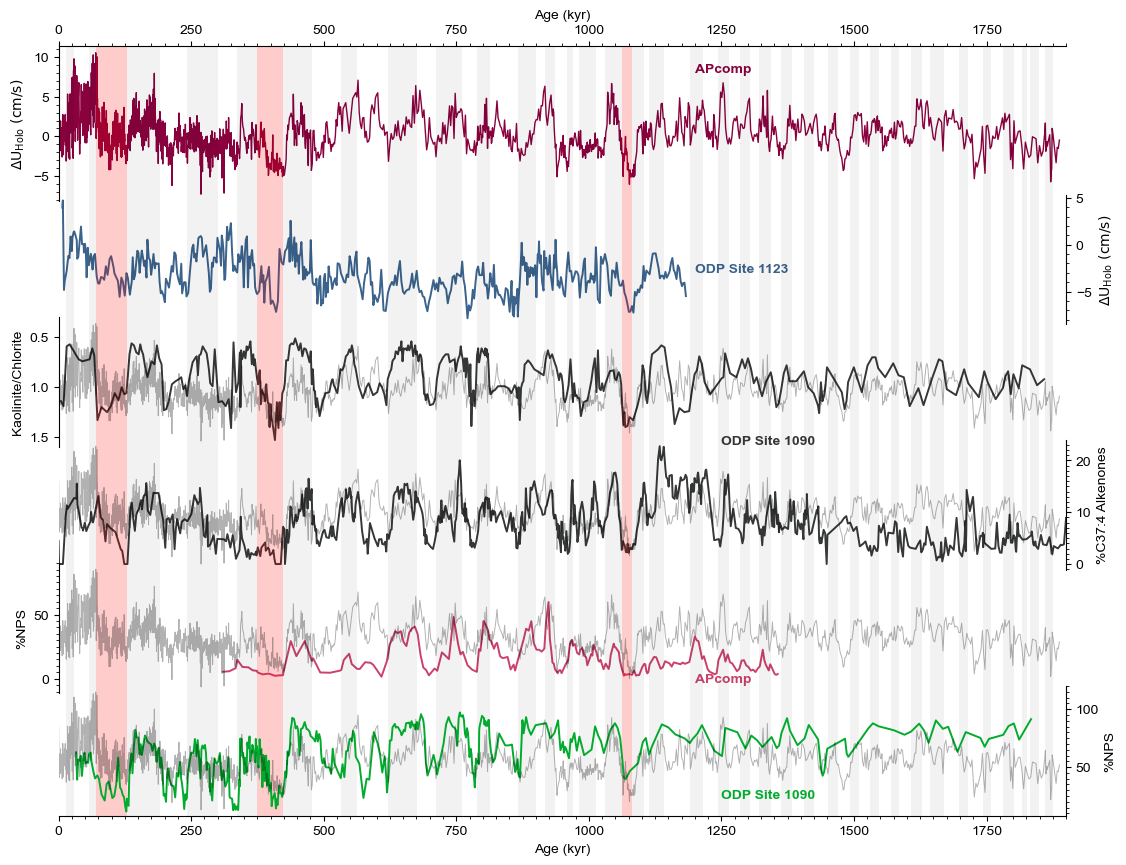

In [9]:
f,ax = plt.subplots(6,1,sharex=True,figsize=(13,10),gridspec_kw={'height_ratios':[1.2,1,1,1,1,1]})

plt.subplots_adjust(hspace=-0.1)

### SS records
## APcomp
x = apcomp['LR04_age']
y = apcomp['dU_dhol_mccave']
yerr = apcomp['dU_dhol_mccave_2std']
n = y.notnull()
ax[0].plot(x[n],y[n],color=c1,alpha=1,lw=1)


## 1123
x = odp1123_ss['LR04 Age (Elderfield 2012)']
y = odp1123_ss['dU_dhol_mccave']
n = y.notnull()
ax[1].plot(x[n],y[n],color='xkcd:denim',alpha=1,lw=1.4)


## ODP 1090 clay
x = odp1090_clay['Age (Martinez)']
y = odp1090_clay['Kao/Chl']
n = y.notnull()
ax[2].plot(x[n],y[n],color='xkcd:dark grey',alpha=1,lw=1.4)
ax[2].invert_yaxis()

ax2 = ax[2].twinx()
x = apcomp['LR04_age']
y = apcomp['dU_dhol_mccave']
n = y.notnull()
ax2.plot(x[n],y[n],color='k',alpha=0.3,lw=0.7)
ax2.axis('off')

## ODP 1090 alkenones
x = odp1090_sst['Age (ka)']
y = odp1090_sst['%C37:4']
n = y.notnull()
ax[3].plot(x[n],y[n],color='xkcd:dark grey',alpha=1,lw=1.4)

ax3 = ax[3].twinx()
x = apcomp['LR04_age']
y = apcomp['dU_dhol_mccave']
n = y.notnull()
ax3.plot(x[n],y[n],color='k',alpha=0.3,lw=0.7)
ax3.axis('off')

## U1475 NPS
x = u1475_nps['Age model [ka]']
y = u1475_nps['N. pachyderma s [%]']
n = y.notnull()
ax[4].plot(x[n],y[n],color='xkcd:dark pink',alpha=1,lw=1.4)

ax4 = ax[4].twinx()
x = apcomp['LR04_age']
y = apcomp['dU_dhol_mccave']
n = y.notnull()
ax4.plot(x[n],y[n],color='k',alpha=0.3,lw=0.7)
ax4.axis('off')

## ODP 1090 NPS
x = odp1090_nps['Age (Martinez)']
y = odp1090_nps['N. pachyderma s [%]']
n = y.notnull()
ax[5].plot(x[n],y[n],color='xkcd:kelly green',alpha=1,lw=1.4)

ax5 = ax[5].twinx()
x = apcomp['LR04_age']
y = apcomp['dU_dhol_mccave']
n = y.notnull()
ax5.plot(x[n],y[n],color='k',alpha=0.3,lw=0.7)
ax5.axis('off')

#ax[4].set_yscale('log')
##3 format
ax[0].set_xlim(0,1900)

ax[0].xaxis.set_label_position('top')
for a in ax:
    a.patch.set_visible(False)
    if a != ax[0]:
        a.spines['top'].set_visible(False)
    if a != ax[-1]:
        a.spines['bottom'].set_visible(False)
        a.xaxis.set_ticks_position('none')
        
for a in ax[1::2]:
    a.yaxis.set_ticks_position('right')
    a.yaxis.set_label_position('right')
    a.spines['left'].set_visible(False)
for a in ax[::2]:
    a.spines['right'].set_visible(False)
ax[0].xaxis.set_ticks_position('top')
    
    

ymax = 5.93
# ax[-1].axvspan(12,19,clip_on=False,ymax=ymax,alpha=0.1)
for i in range(0,71):
    if i%2==1:
        ax[-1].axvspan(mis_bounds['Age(ka)'].loc[i],mis_bounds['Age(ka)'].loc[i+1],facecolor='k',alpha=0.05,ymax=ymax,clip_on=False,zorder=-1)
ax[-1].axvspan(mis_bounds['Age(ka)'].loc[30],mis_bounds['Age(ka)'].loc[31],facecolor='r',alpha=0.2,ymax=ymax,clip_on=False,zorder=-1)
ax[-1].axvspan(mis_bounds['Age(ka)'].loc[10],mis_bounds['Age(ka)'].loc[11],facecolor='r',alpha=0.2,ymax=ymax,clip_on=False,zorder=-1)
ax[-1].axvspan(mis_bounds['Age(ka)'].loc[4],mis_bounds['Age(ka)'].loc[5],facecolor='r',alpha=0.2,ymax=ymax,clip_on=False,zorder=-1)

## labels 1
for a in ax:
    a.yaxis.set_minor_locator(MultipleLocator(1))
ax[0].xaxis.set_minor_locator(MultipleLocator(25))
ax[4].yaxis.set_minor_locator(MultipleLocator(5))
ax[5].yaxis.set_minor_locator(MultipleLocator(5))

ax[0].set_ylabel('$\mathrm{\Delta U_{Holo}\ (cm/s)}$')
ax[1].set_ylabel('$\mathrm{\Delta U_{Holo}\ (cm/s)}$')
ax[2].set_ylabel('Kaolinite/Chlorite')
ax[3].set_ylabel('%C37:4 Alkenones')
ax[4].set_ylabel('%NPS')
ax[5].set_ylabel('%NPS')
ax[0].set_xlabel('Age (kyr)')
ax[-1].set_xlabel('Age (kyr)')

ax[0].text(1200,8,'APcomp',color=c1,fontweight='bold')
ax[1].text(1200,-3,'ODP Site 1123',color='xkcd:denim',fontweight='bold')
ax[3].text(1250,23,'ODP Site 1090',color='xkcd:dark grey',fontweight='bold')
ax[5].text(1250,23,'ODP Site 1090',color='xkcd:kelly green',fontweight='bold')
ax[4].text(1200,-3,'APcomp',color='xkcd:dark pink',fontweight='bold')


plt.subplots_adjust(hspace=-0.05)

ax[5].set_ylim(8,120)
ax[4].set_ylim(-11,90)
ax[2].set_ylim(1.6,0.3)

plt.savefig('figures/SF12_aphydro_long.pdf',bbox_inches='tight')

### Comparing APcomp flow speed and ODP 1090 alkenone records

In [30]:
df_int = pd.DataFrame()


tnew = np.arange(5,1800,2)
df_int['age'] = tnew

f = interp1d(apcomp['LR04_age'],apcomp['dU_dhol_mccave'],bounds_error=False)
df_int['apcomp_ss'] = f(tnew)

f = interp1d(odp1090_sst['Age (ka)'],odp1090_sst['SST(C)'],bounds_error=False)
df_int['odp1090_sst'] = f(tnew)

f = interp1d(odp1090_sst['Age (ka)'],odp1090_sst['%C37:4'],bounds_error=False)
df_int['odp1090_alk'] = f(tnew)

f = interp1d(odp1090_clay['Age (Martinez)'],odp1090_clay['Kao/Chl'],bounds_error=False)
df_int['odp1090_clay'] = f(tnew)

f = interp1d(u1475_sst['Age [ka BP]'],u1475_sst['SST (1-12) [¬∞C]'],bounds_error=False)
df_int['u1475_sst'] = f(tnew)


(0.1, 0.5)

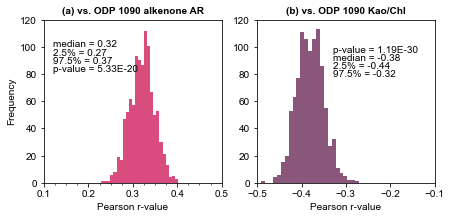

In [37]:
#### bootstrap correlation
from scipy.stats import bootstrap
from scipy.stats import pearsonr

rng = np.random.default_rng()

def replicate(data1,data2,sims=10000,stat=np.corrcoef):
    rep=np.empty(sims)
    for i in range(sims):
        inds=np.random.choice(a=data1.index,size=len(data1),replace=True)
        rep[i]=stat(data1.loc[inds],data2.loc[inds])[0,1]
    return(rep)

n = df_int['odp1090_alk'].notnull()
y1 = df_int['apcomp_ss'][n]
y2 = df_int['odp1090_alk'][n]
n = y1.notnull()
corr =replicate(y1[n],y2[n],sims=1000,stat=np.corrcoef)

n = df_int['odp1090_clay'].notnull()
y1 = df_int['apcomp_ss'][n]
y2 = df_int['odp1090_clay'][n]
n = y1.notnull()
corr2 =replicate(y1[n],y2[n],sims=1000,stat=np.corrcoef)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.size'] = 10

fig, ax = plt.subplots(1,2,figsize=(7,3))
ax[0].hist(corr, bins=25,alpha=0.7,fc='xkcd:ruby')
# ax[0].axvline(np.percentile(corr,[2.5]).round(3),c='k',linestyle='--',alpha=0.5)
# ax[0].axvline(np.percentile(corr,[97.5]).round(3),c='k',linestyle='--',alpha=0.5)
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Pearson r-value')


ax[1].hist(corr2, bins=25,alpha=0.7,fc='xkcd:plum')
# ax[1].axvline(np.percentile(corr2,[2.5]).round(3),c='k',linestyle='--',alpha=0.5)
# ax[1].axvline(np.percentile(corr2,[97.5]).round(3),c='k',linestyle='--',alpha=0.5)
ax[1].set_xlabel('Pearson r-value')
ax[0].set_title('(a) vs. ODP 1090 alkenone AR',fontsize=10,fontweight='bold')
ax[1].set_title('(b) vs. ODP 1090 Kao/Chl',fontsize=10,fontweight='bold')

ax[0].text(0.12,100,'median = '+str(np.round(np.median(corr),2)))
ax[0].text(0.12,94,'2.5% = '+str(np.round(np.percentile(corr,2.5),2)))
ax[0].text(0.12,88,'97.5% = '+str(np.round(np.percentile(corr,97.5),2)))

ax[1].text(-0.33,90,'median = '+str(np.round(np.median(corr2),2)))
ax[1].text(-0.33,84,'2.5% = '+str(np.round(np.percentile(corr2,2.5),2)))
ax[1].text(-0.33,78,'97.5% = '+str(np.round(np.percentile(corr2,97.5),2)))

from decimal import Decimal
p1 = pearsonr(df.dropna()['apyl'],df.dropna()['odpyl'])[1]
ax[0].text(0.12,82,'p-value = ' + "{0:.2E}".format(p1))

p2 = pearsonr(df.dropna()['apyl'],df.dropna()['ocpyl'])[1]
ax[1].text(-0.33,96,'p-value = ' + "{0:.2E}".format(p2))

ax[0].xaxis.set_minor_locator(MultipleLocator(0.025))
ax[1].set_ylim(0,120)
ax[0].set_ylim(0,120)
ax[1].set_xlim(-0.5,-0.1)
ax[0].set_xlim(0.1,0.5)

(-0.41, 0.0)

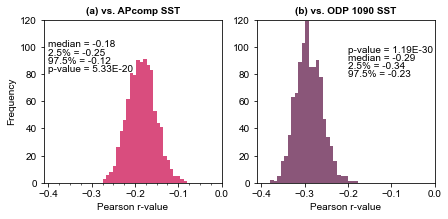

In [45]:
#### bootstrap correlation
rng = np.random.default_rng()

n = df_int['u1475_sst'].notnull()
y1 = df_int['apcomp_ss'][n]
y2 = df_int['u1475_sst'][n]
n = y1.notnull()
corr =replicate(y1[n],y2[n],sims=1000,stat=np.corrcoef)

n = df_int['odp1090_sst'].notnull()
y1 = df_int['apcomp_ss'][n]
y2 = df_int['odp1090_sst'][n]
n = y1.notnull()
corr2 =replicate(y1[n],y2[n],sims=1000,stat=np.corrcoef)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.size'] = 10

fig, ax = plt.subplots(1,2,figsize=(7,3))
ax[0].hist(corr, bins=25,alpha=0.7,fc='xkcd:ruby')
# ax[0].axvline(np.percentile(corr,[2.5]).round(3),c='k',linestyle='--',alpha=0.5)
# ax[0].axvline(np.percentile(corr,[97.5]).round(3),c='k',linestyle='--',alpha=0.5)
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Pearson r-value')


ax[1].hist(corr2, bins=25,alpha=0.7,fc='xkcd:plum')
# ax[1].axvline(np.percentile(corr2,[2.5]).round(3),c='k',linestyle='--',alpha=0.5)
# ax[1].axvline(np.percentile(corr2,[97.5]).round(3),c='k',linestyle='--',alpha=0.5)
ax[1].set_xlabel('Pearson r-value')
ax[0].set_title('(a) vs. APcomp SST',fontsize=10,fontweight='bold')
ax[1].set_title('(b) vs. ODP 1090 SST',fontsize=10,fontweight='bold')

ax[0].text(-0.4,100,'median = '+str(np.round(np.median(corr),2)))
ax[0].text(-0.4,94,'2.5% = '+str(np.round(np.percentile(corr,2.5),2)))
ax[0].text(-0.4,88,'97.5% = '+str(np.round(np.percentile(corr,97.5),2)))

ax[1].text(-0.2,90,'median = '+str(np.round(np.median(corr2),2)))
ax[1].text(-0.2,84,'2.5% = '+str(np.round(np.percentile(corr2,2.5),2)))
ax[1].text(-0.2,78,'97.5% = '+str(np.round(np.percentile(corr2,97.5),2)))

from decimal import Decimal
p1 = pearsonr(df.dropna()['apyl'],df.dropna()['odpyl'])[1]
ax[0].text(-0.4,82,'p-value = ' + "{0:.2E}".format(p1))

p2 = pearsonr(df.dropna()['apyl'],df.dropna()['ocpyl'])[1]
ax[1].text(-0.2,96,'p-value = ' + "{0:.2E}".format(p2))

ax[0].xaxis.set_minor_locator(MultipleLocator(0.025))
ax[1].set_ylim(0,120)
ax[0].set_ylim(0,120)
ax[1].set_xlim(-0.41,0)
ax[0].set_xlim(-0.41,0)